In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell # 这个对象设置所有行全部输出

# 设置该对象ast_node_interactivity属性的值为all，表示在notebook下每一行有输出的代码全部输出运算结果
InteractiveShell.ast_node_interactivity = "all" 

In [49]:
# prepare fake data - type:dict;
rowdata = {
    'Color_Depth':[14.13,13.2,13.16,14.27,13.24,12.07,12.43,11.79,12.37,12.04],
    'Alcohol_concentration': [5.64,4.28,5.68,4.80,4.22,2.76,3.94,3.1,2.12,2.6],
    'classes': [0,0,0,0,0,1,1,1,1,1] # 0:Pinot_Noir - 1:Cabernet Sauvignon
}

# get dataframe
wine_data = pd.DataFrame(rowdata)
wine_data

,Color_Depth,Alcohol_concentration,classes
0,14.13,5.64,0
1,13.20,4.28,0
2,13.16,5.68,0
3,14.27,4.80,0
4,13.24,4.22,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.10,1
8,12.37,2.12,1
9,12.04,2.60,1


In [51]:
# get feature_map
x = np.array(wine_data.iloc[:,0:2])

# get target
y = np.array(wine_data.iloc[:,-1]) 
x
y

array([[14.13,  5.64],
       [13.2 ,  4.28],
       [13.16,  5.68],
       [14.27,  4.8 ],
       [13.24,  4.22],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.1 ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Text(0.5, 0, 'Alcohol concentration')

Text(0, 0.5, 'Color Depth')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei
findfont: Generic family 'sans-serif' not foun

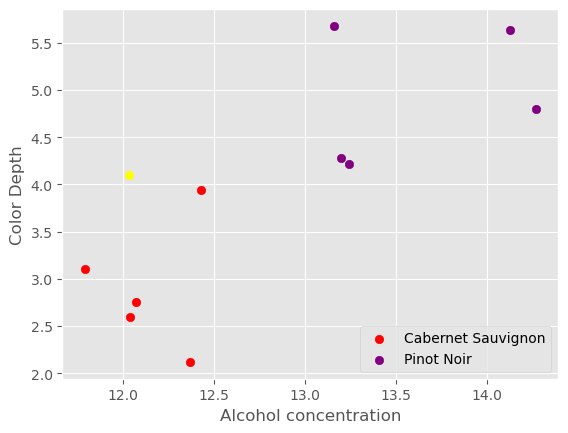

In [53]:
# prepare a new data,predict which classes
new_data = np.array([12.03,4.1])

# get scatter plot
# target of 1,about Cabernet Sauvignon
plt.scatter(x[y==1,0], x[y==1,1], color='red', label='Cabernet Sauvignon')

# target of 0,about Pinot Noir
plt.scatter(x[y==0,0], x[y==0,1], color='purple', label='Pinot Noir')

# new data,unknown classes
plt.scatter(new_data[0],new_data[1], color='yellow')

# set scatter attrs
plt.xlabel('Alcohol concentration')
plt.ylabel('Color Depth')
plt.legend(loc='lower right')

# save
plt.savefig('img_1.png')

In [55]:
# import math
from math import sqrt

# calculate
distance = [sqrt(np.sum((x_num - new_data) ** 2)) for x_num in x ] # 循环遍历
distance

[2.6041505332833594,
 1.1837651794169315,
 1.9424983912477256,
 2.3468276459936295,
 1.2159358535712326,
 1.3405968819895113,
 0.4308131845707605,
 1.0283968105745949,
 2.0089798406156287,
 1.500033332962971]

In [35]:
# sort the distance array by index
sort_dist = np.argsort(distance)
sort_dist

array([6, 7, 1, 4, 5, 9, 2, 8, 3, 0])

In [57]:
# hyper params,default for 3
k = 3

# from sort dist get the first three samples and get target class by index
topK = [y[i] for i in sort_dist[:k]]
topK

[1, 1, 0]

In [39]:
# transform to series and value_counts(),Count the total number of samples belonging to each category（统计所属各个类别的样本总数）
pd.Series(topK).value_counts()

1    2
0    1
Name: count, dtype: int64

In [41]:
# The category with the largest number of samples is the target category
# 样本数最大的类别就是目标类别
pd.Series(topK).value_counts().index[0]

1

In [43]:
# define a function for KNN
def KNN_alo(new_data,dataset,k):
    '''
    get a KNN classification
    :params new_data:test data
    :params dataset:train data
    :params k:hyper params,k nearest neighbors
    :return:class result
    '''
    result = []
    
    X = np.array(wine_data.iloc[:,0:2])
    y = np.array(wine_data.iloc[:,-1])
    
    distance = [sqrt(np.sum((x_num - new_data) ** 2)) for x_num in X ]
    sort_dist = np.argsort(distance)
    topK = [y[i] for i in sort_dist[:k]]

    result.append(pd.Series(topK).value_counts().index[0])

    return result

In [63]:
def test():
    new_data=np.array([12.03,4.1])
    k = 3
    print(f'by KNN,the test data:{new_data}target to:{KNN_alo(new_data,wine_data,k)[0]}')

In [64]:
test()

by KNN,the test data:[12.03  4.1 ]target to:1
